In [1]:
import numpy as np
import scipy.integrate
import scipy.optimize

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

0.034567397081706634


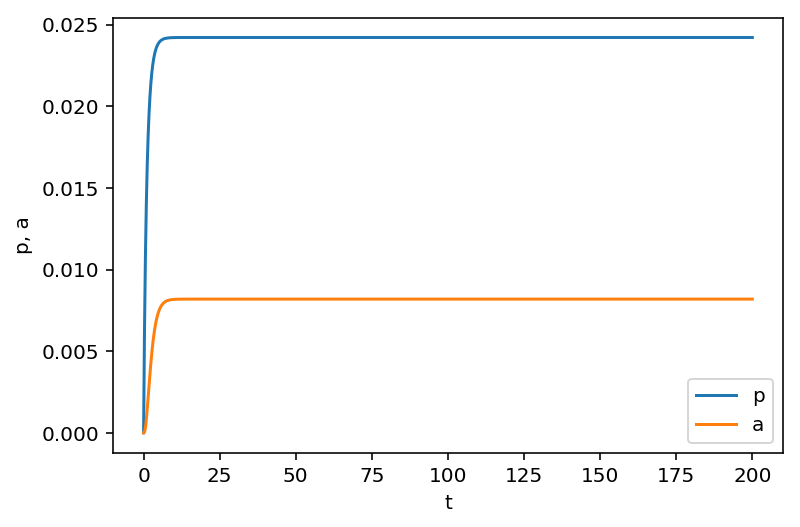

In [35]:
def f(pa, t, alpha1, alpha2, alpha3, alpha4, gamma):
    """Right hand side for toggle ODEs."""
    p, a = pa
    return np.array([-gamma*p + (1/(1 + a**2)) * (alpha1 + ((alpha2*p**2)/(1 + p**2))),
                     -a + (alpha4*p**2)/((alpha3)**2 + p**2)])

# Parameters
alpha1 = 0.025
alpha2 = 9
alpha3 = 0.5 
alpha4 = 3.5
gamma = 1.25
args = (alpha1, alpha2, alpha3, alpha4, gamma)

# Initial condition
pa0 = np.array([0, 0])

# Solve
n = 2000
t = np.linspace(0, 200, n)
pa = scipy.integrate.odeint(f, pa0, t, args=args)
#print(pa[:,1])

# Plot
plt.plot(t, pa)
plt.rcParams["image.cmap"] = "Set2"
plt.xlabel('t')
plt.ylabel('p, a')
plt.legend(('p', 'a'));

p0 = .210
var = (sum((pa[:,0] - p0)**2))/n
print(var)

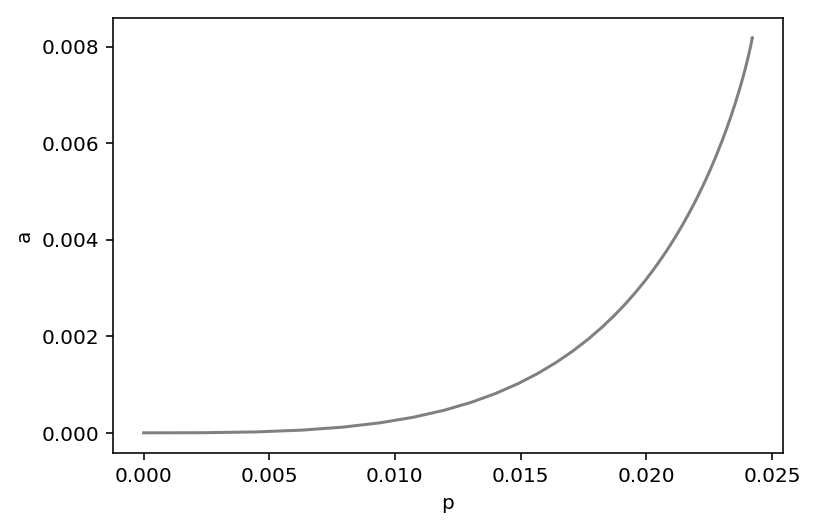

In [36]:
# Plot
plt.plot(pa[:,0], pa[:,1], color='gray')
plt.xlabel('p')
plt.ylabel('a');

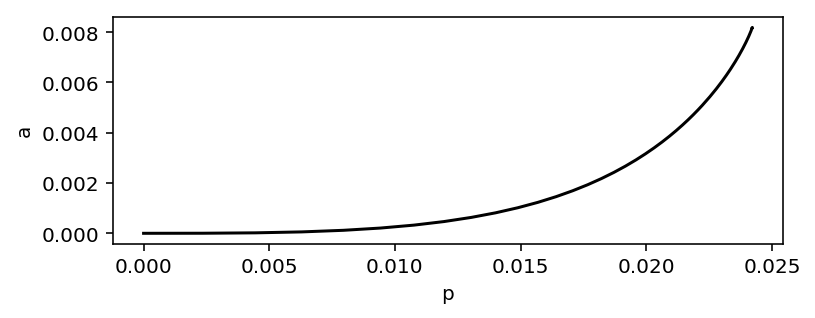

In [37]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('p')
ax.set_ylabel('a')
ax.set_aspect('equal')

for p0 in range(0,1):
    for a0 in range(0,1):
        pa = scipy.integrate.odeint(f, np.array([p0, a0]), t, args=args)
        ax.plot(*pa.transpose(), color='black');

In [38]:
def vector_field(ax, f, u_range, v_range, args=(), n_grid=100):
    
    # Set up u,v space
    u = np.linspace(u_range[0], u_range[1], n_grid)
    v = np.linspace(v_range[0], v_range[1], n_grid)
    uu, vv = np.meshgrid(u, v)

    # Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = f(np.array([uu[i,j], vv[i,j]]), None, *args)

    # Compute speed
    speed = np.sqrt(u_vel**2 + v_vel**2)

    # Make linewidths proportional to speed,
    # with minimal line width of 0.5 and max of 3
    lw = 0.5 + 2.5 * speed / speed.max()

    # Make stream plot
    ax.streamplot(uu, vv, u_vel, v_vel, linewidth=lw, arrowsize=1.2, 
                  density=2.5, color='silver')

    return ax

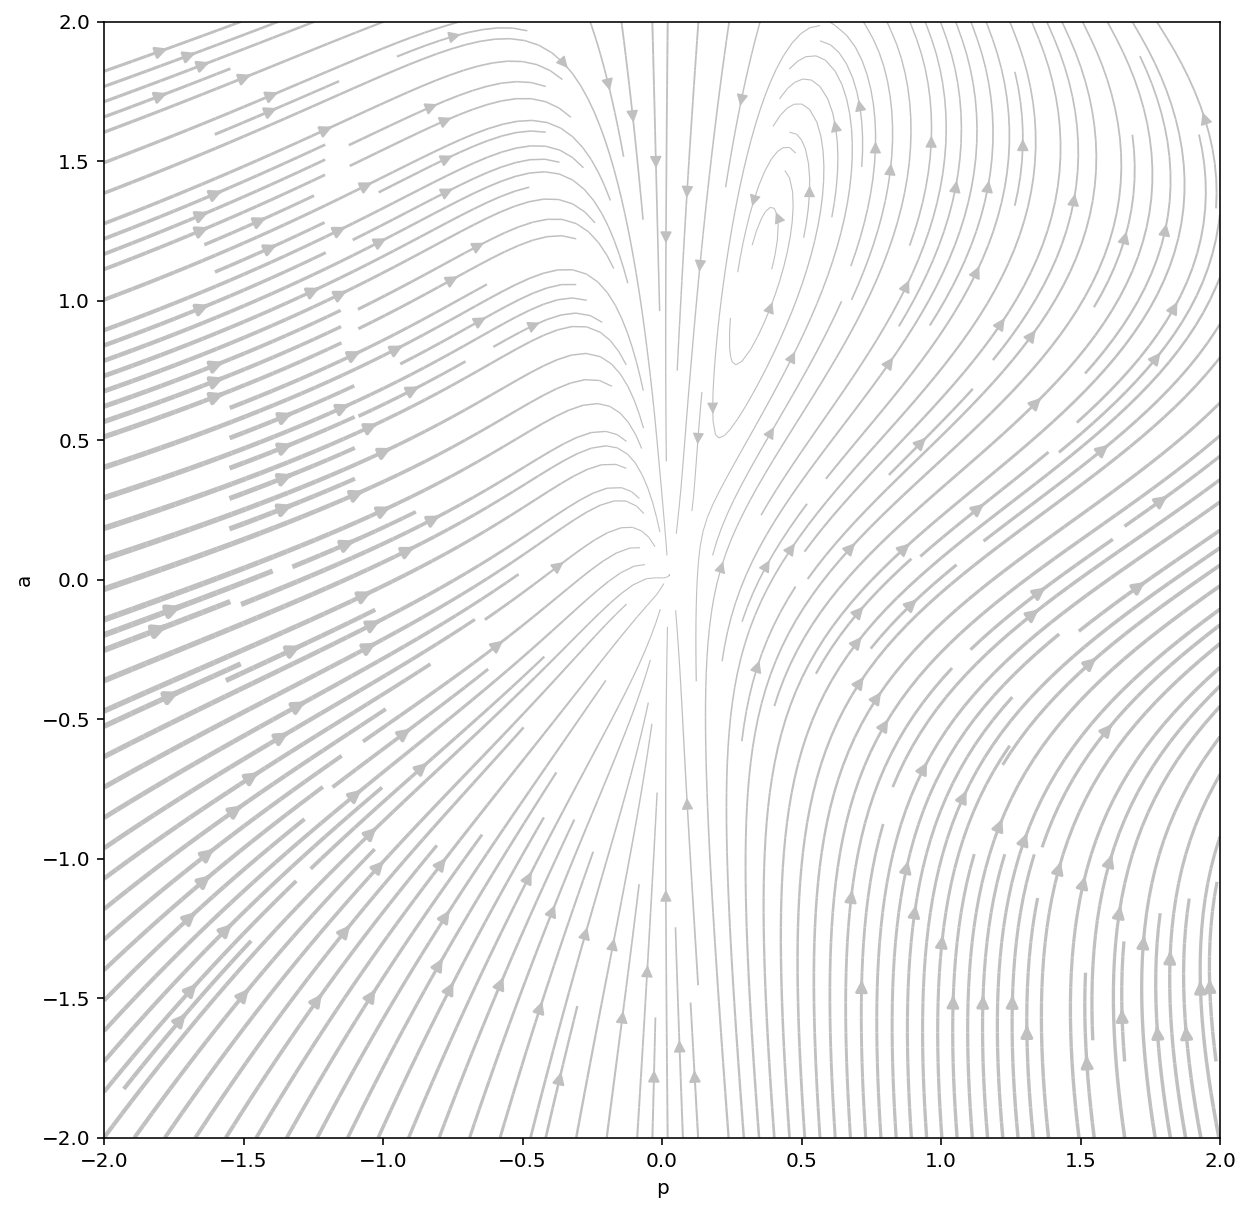

In [44]:
fig, ax = plt.subplots(1, 1, figsize = (10, 20))
ax.set_xlabel('p')
ax.set_ylabel('a')
ax.set_aspect('equal')

ax = vector_field(ax, f, (-2,2), (-2, 2), args=args)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


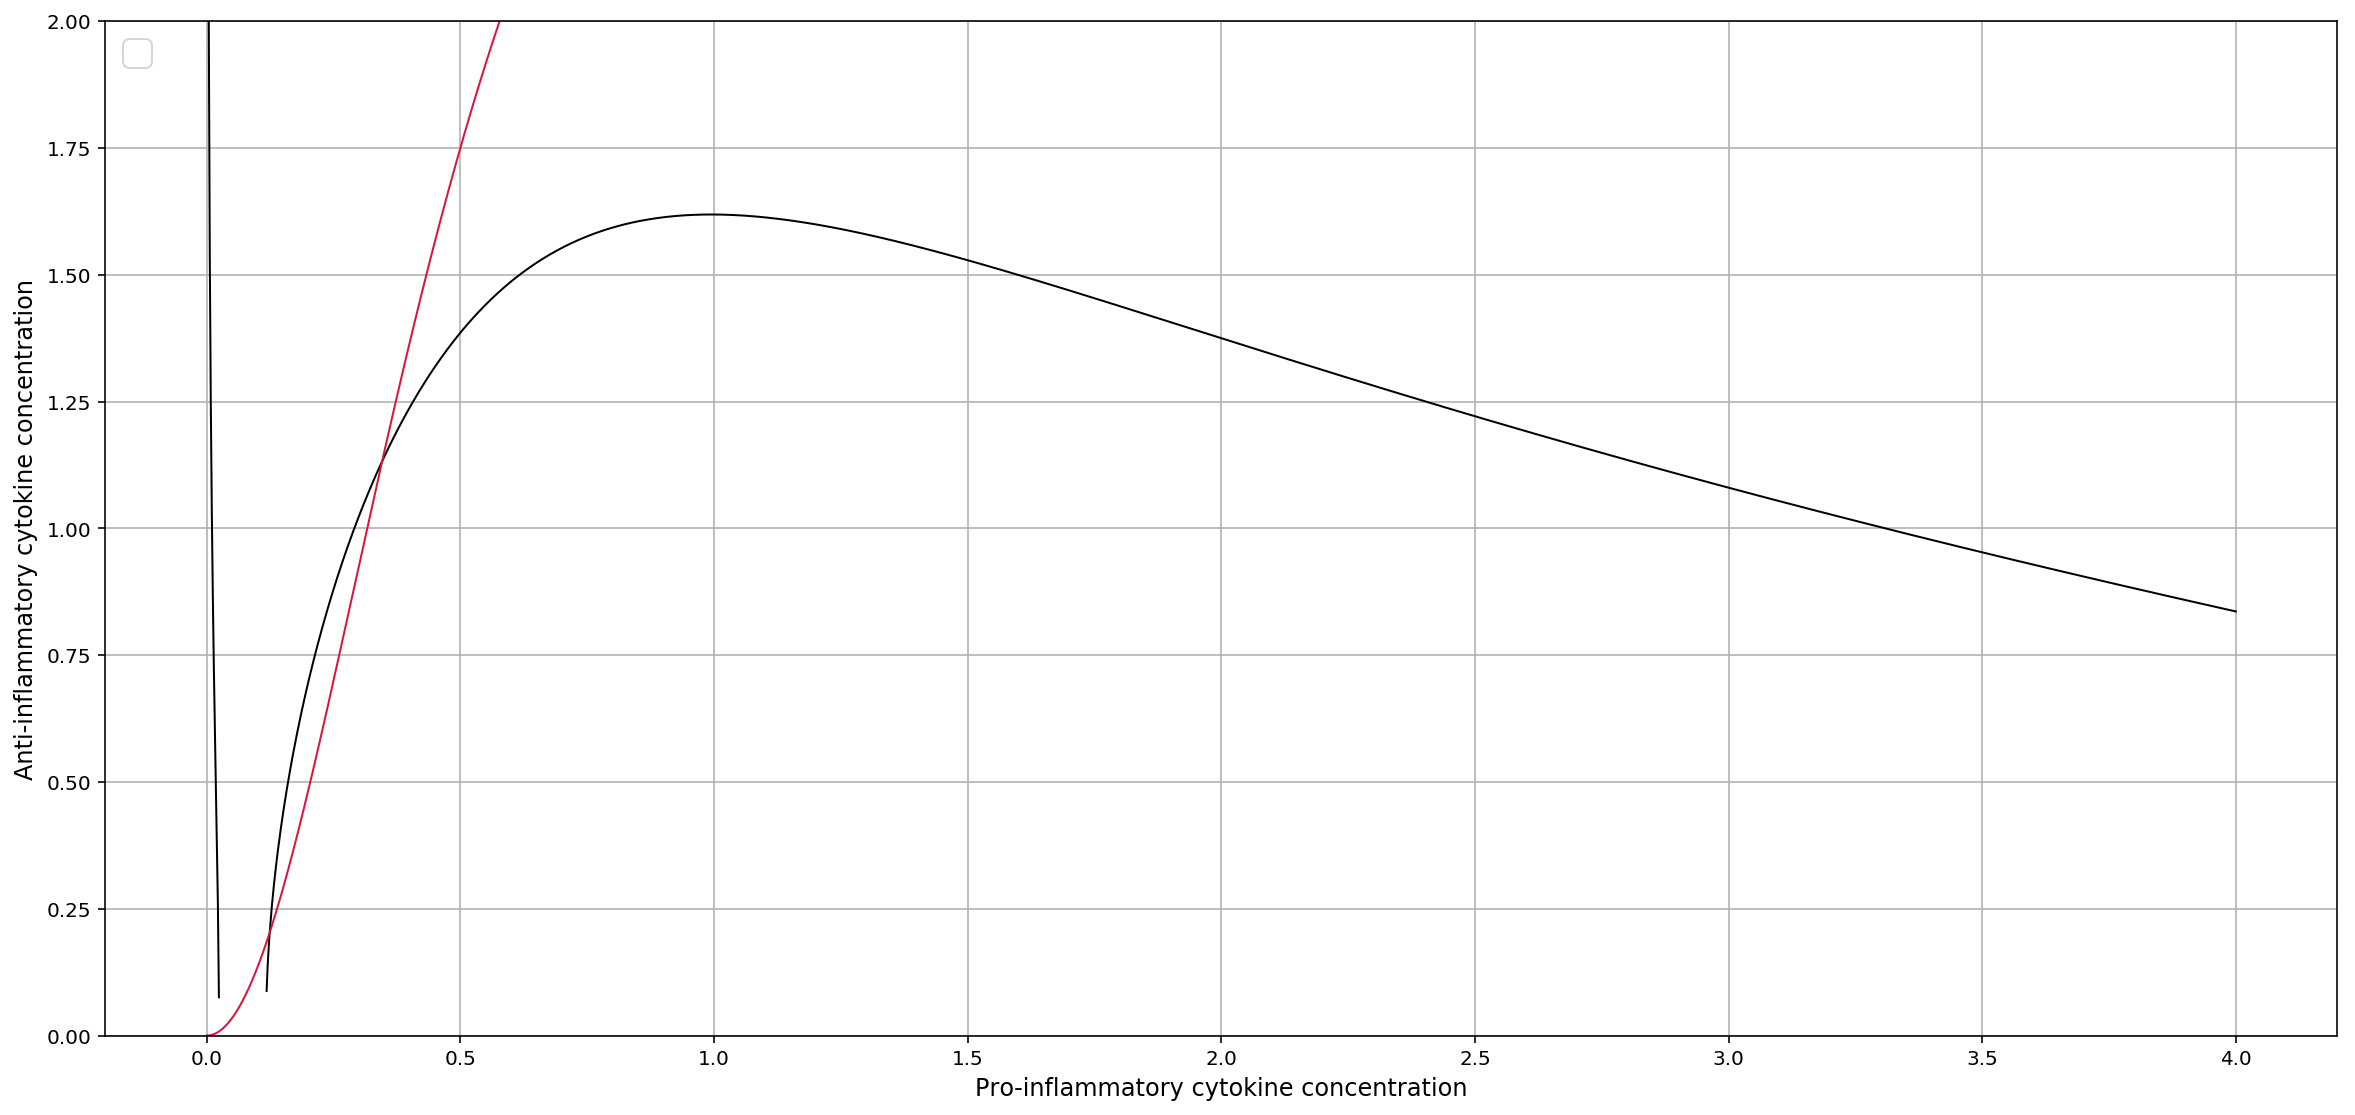

In [40]:
import matplotlib.animation as animation 

def plot_null_clines_toggle(ax, a_range, b_range, alpha1, alpha2, alpha3, alpha4, gamma, 
                            colors=['#1f77b4', '#1f77b4'], lw=3):
    """Add nullclines to ax."""
    # a-nullcline
    p = np.linspace(a_range[0], a_range[1], 2000)
    nca = np.sqrt((((p**2)*(alpha1 + alpha2) + alpha1)/(gamma * p * (1 + p**2))) - 1)

    # b-nullcline
    p = np.linspace(a_range[0], a_range[1], 2000)
    nca2 = (alpha4 * p**2)/(alpha3**2 + p**2)

    # Plot
    ax.plot(p, nca,  lw=1, color='black')
    ax.plot(p, nca2, lw=1, color='crimson')
    
    return ax

fig, ax = plt.subplots(figsize=(20,10))
plt.figure(figsize=(20,10))
ax.grid(True)
ax.legend(('$dp/dt = 0$', '$da/dt = 0$'), loc="upper left", fontsize=18);
ax.set_xlabel('Pro-inflammatory cytokine concentration', fontsize=12)
ax.set_ylabel('Anti-inflammatory cytokine concentration', fontsize=12)
ax.set_aspect('equal')
ax.set_ylim(0,2)
ax = plot_null_clines_toggle(ax, [0, 4], [0, 2], alpha1, alpha2, alpha3, alpha4, gamma)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


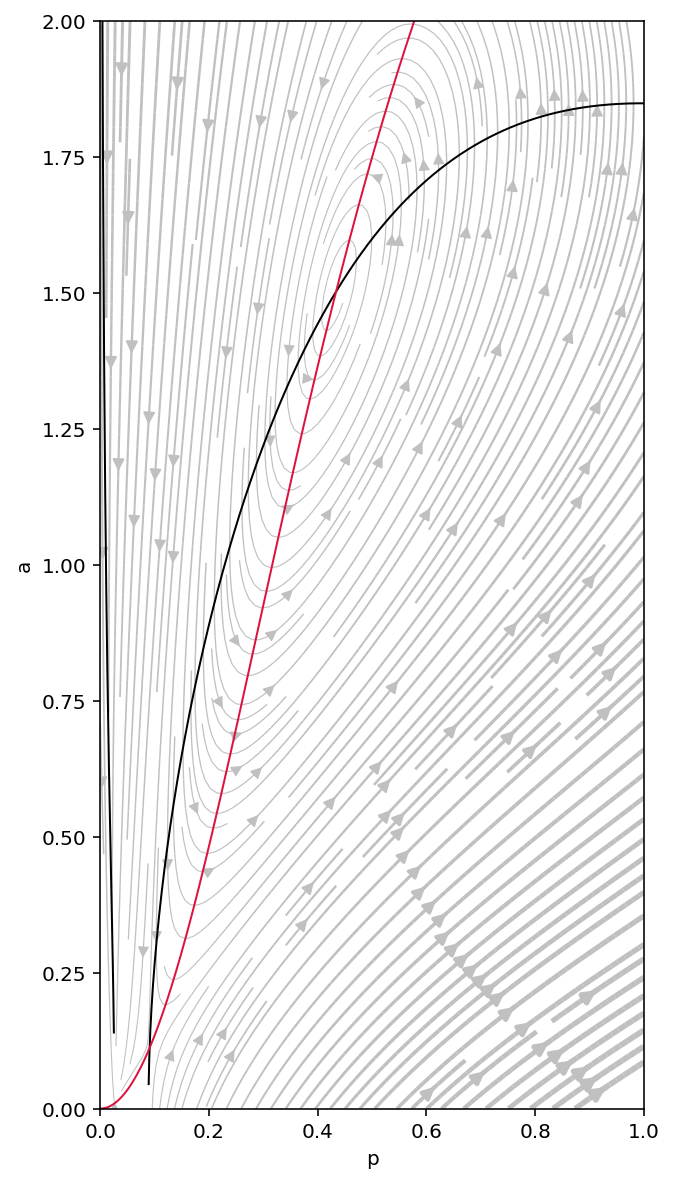

In [33]:
#alpha2 = 11

# Set up the figure
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('p')
ax.set_ylabel('a')
ax.set_aspect('equal')

# Build the plot
a_range = [0, 2]
b_range = [0, 1]
ax.set_ylim(0,2)
ax.set_xlim(0,1)
ax = vector_field(ax, f, (0,1), (0, 2), args=args)
ax = plot_null_clines_toggle(ax, a_range, b_range, alpha1, alpha2, alpha3, alpha4, gamma)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


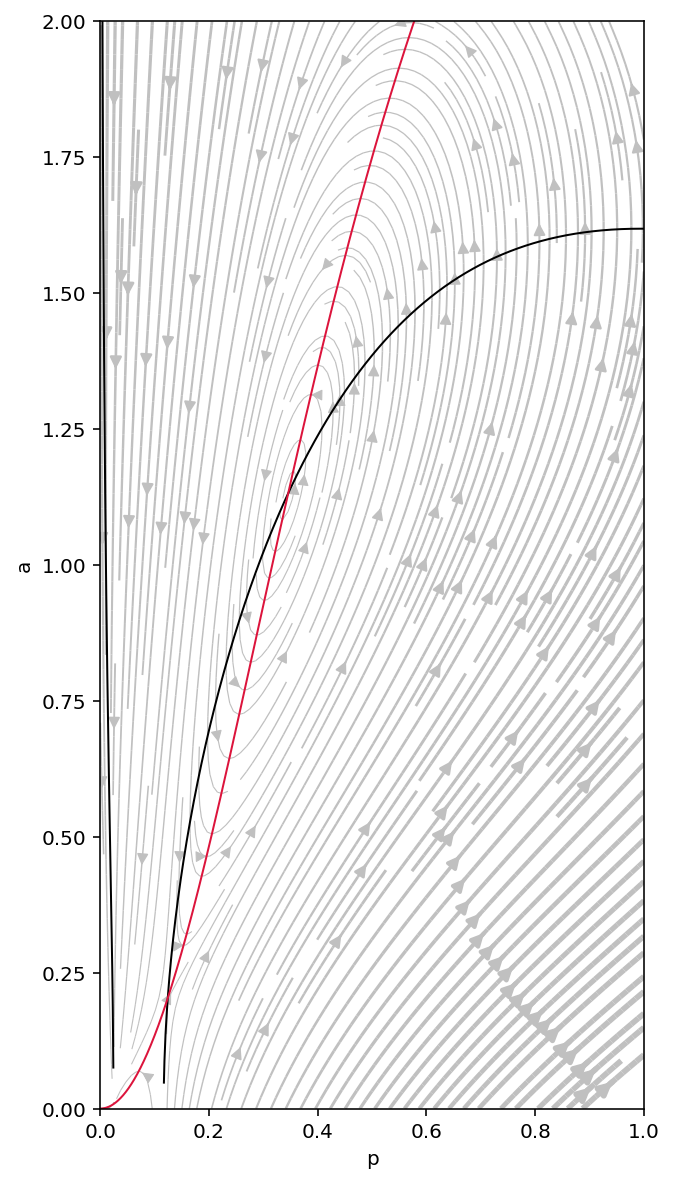

In [43]:
alpha2 = 9

# Set up the figure
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('p')
ax.set_ylabel('a')
ax.set_aspect('equal')

# Build the plot
a_range = [0, 2]
b_range = [0, 1]
ax.set_ylim(0,2)
ax.set_xlim(0,1)
ax = vector_field(ax, f, (0,1), (0, 2), args=args)
ax = plot_null_clines_toggle(ax, a_range, b_range, alpha1, alpha2, alpha3, alpha4, gamma)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


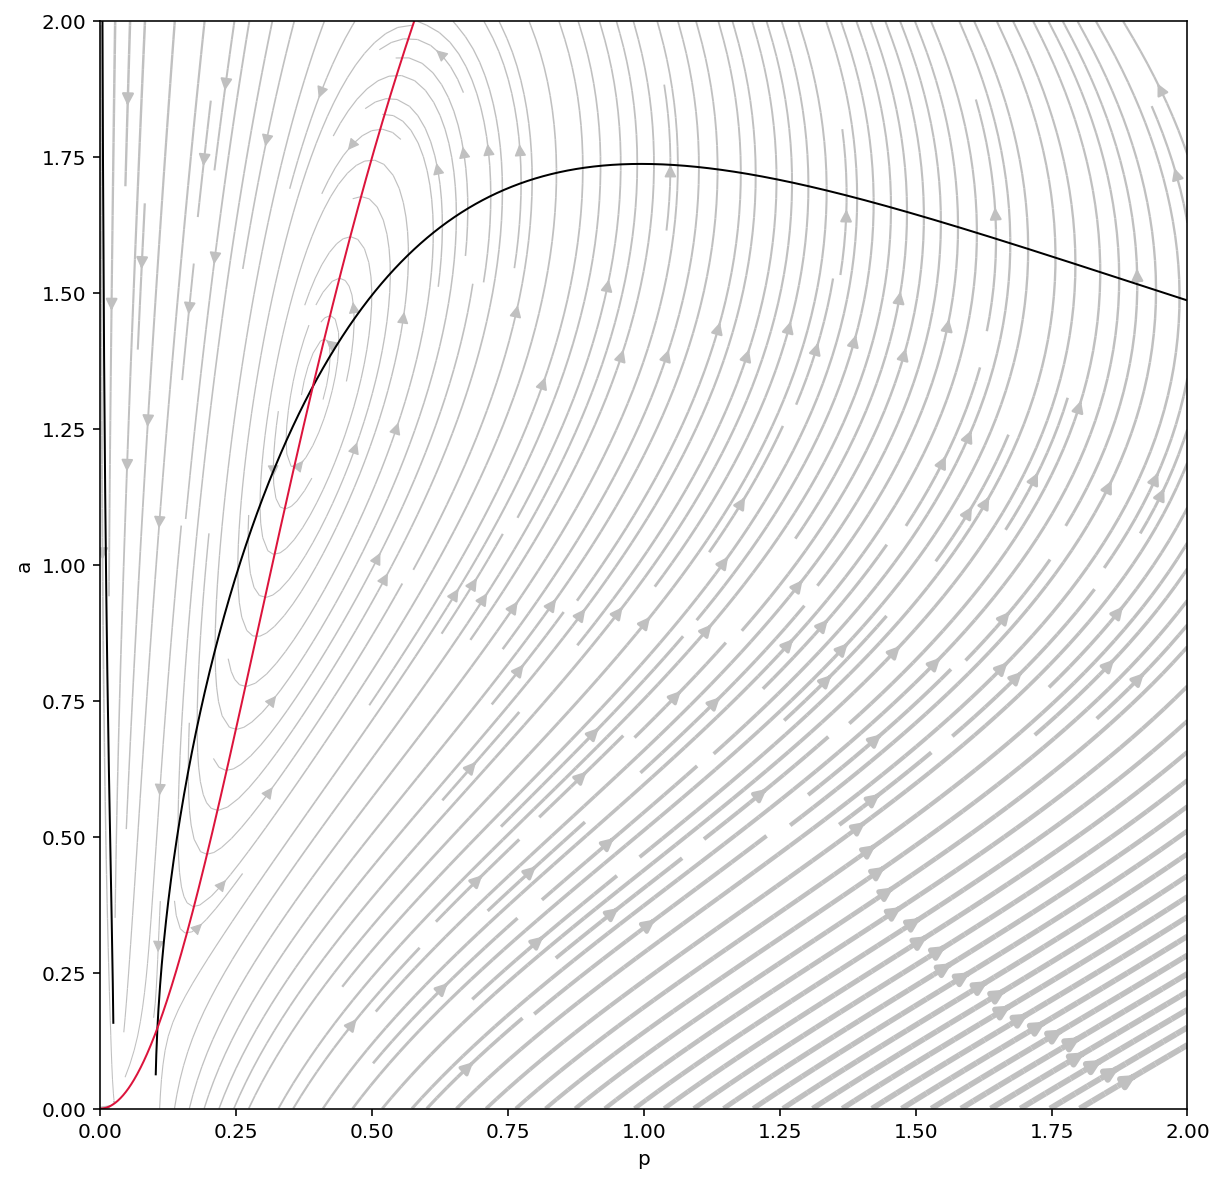

In [50]:
# Set up the figure
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('p')
ax.set_ylabel('a')
ax.set_aspect('equal')

# Build the plot
a_range = [0, 2]
b_range = [0, 2]
ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax = vector_field(ax, f, (0,2), (0, 2), args=args)
ax = plot_null_clines_toggle(ax, a_range, b_range, alpha1, alpha2, alpha3, alpha4, gamma)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


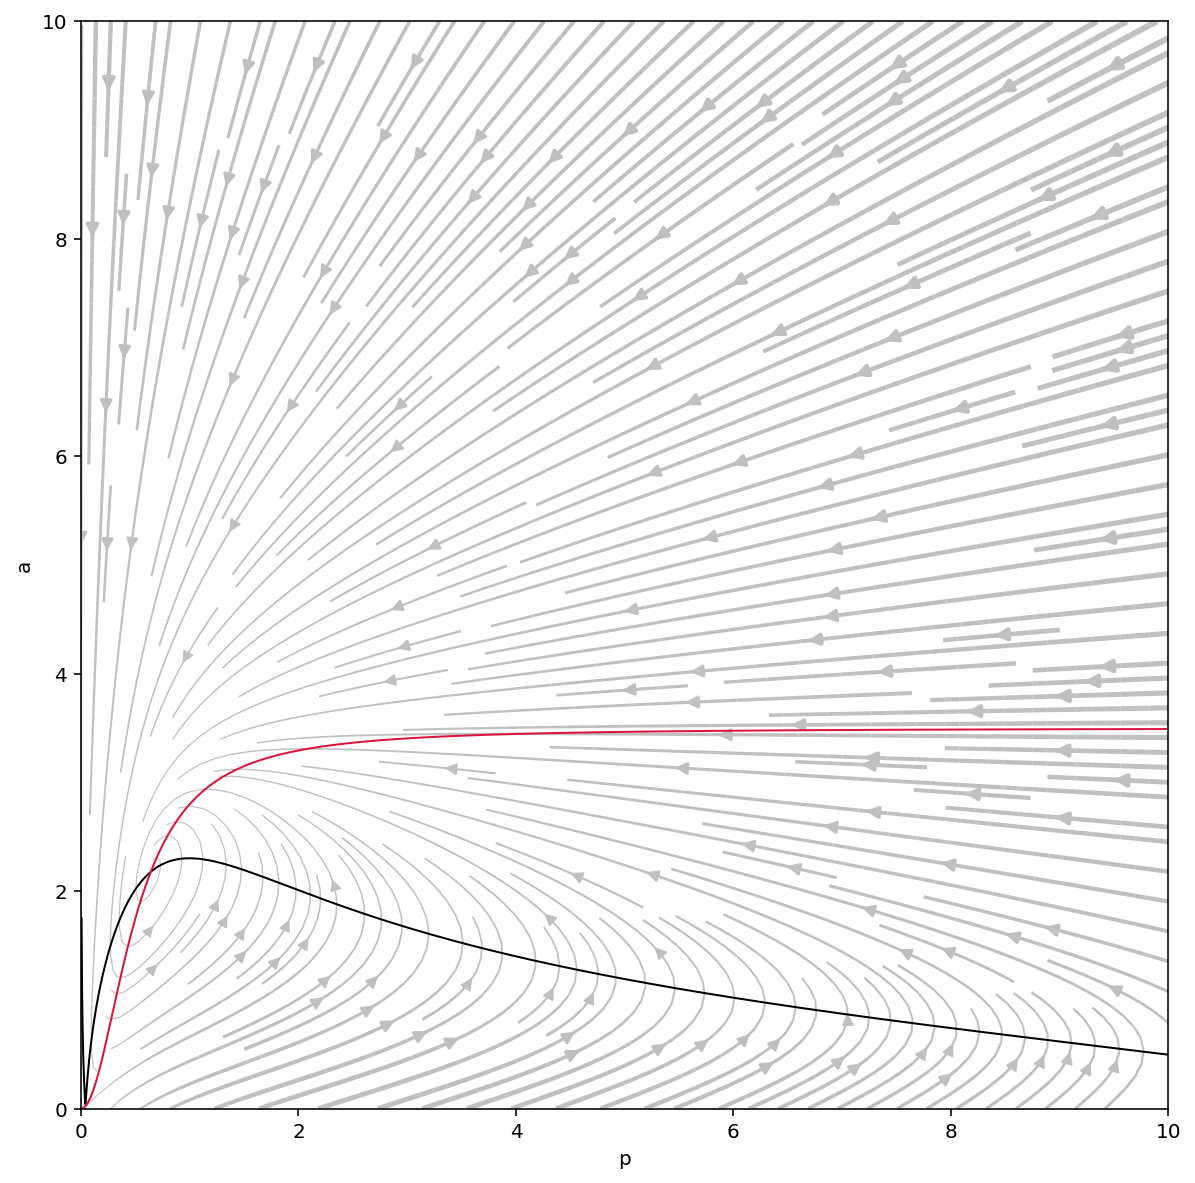

In [58]:
# Set up the figure
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('p')
ax.set_ylabel('a')
ax.set_aspect('equal')

# Build the plot
a_range = [0, 10]
b_range = [0, 10]
ax.set_ylim(0,10)
ax.set_xlim(0,10)
ax = vector_field(ax, f, (0,10), (0, 10), args=args)
ax = plot_null_clines_toggle(ax, a_range, b_range, alpha1, alpha2, alpha3, alpha4, gamma)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


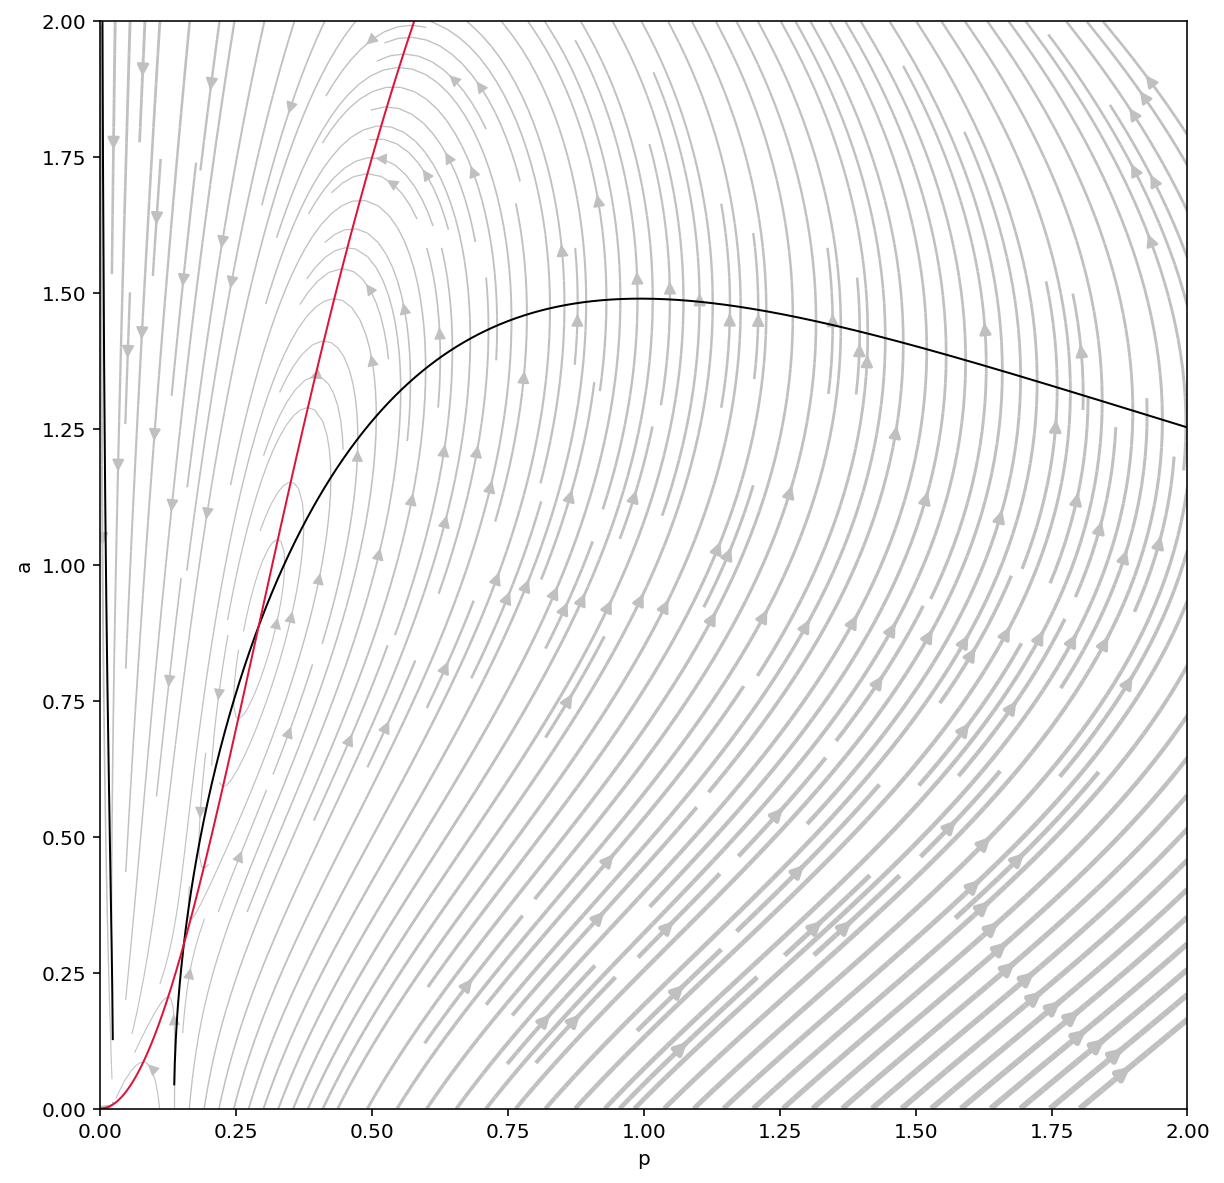

In [65]:
# Set up the figure
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('p')
ax.set_ylabel('a')
ax.set_aspect('equal') #ALPHA2 = 8

# Build the plot
a_range = [0, 2]
b_range = [0, 2]
ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax = vector_field(ax, f, (0,2), (0, 2), args=args)
ax = plot_null_clines_toggle(ax, a_range, b_range, alpha1, alpha2, alpha3, alpha4, gamma)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


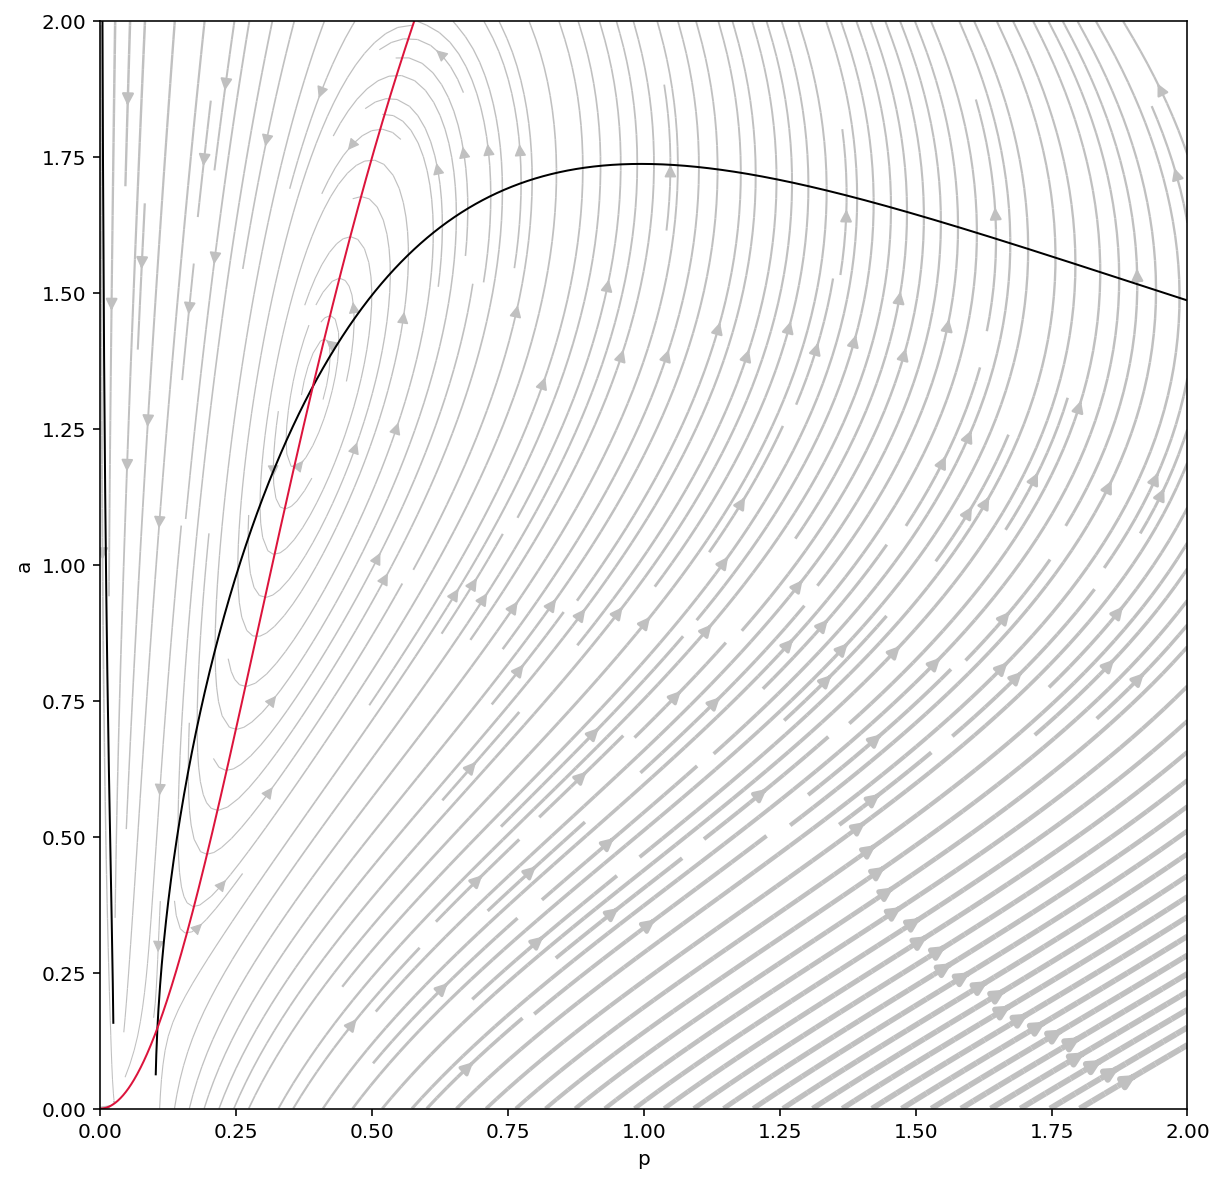

In [71]:
# Set up the figure
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('p')
ax.set_ylabel('a')
ax.set_aspect('equal')

# Build the plot
a_range = [0, 2]
b_range = [0, 2]
ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax = vector_field(ax, f, (0,2), (0, 2), args=args)
ax = plot_null_clines_toggle(ax, a_range, b_range, alpha1, alpha2, alpha3, alpha4, gamma)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


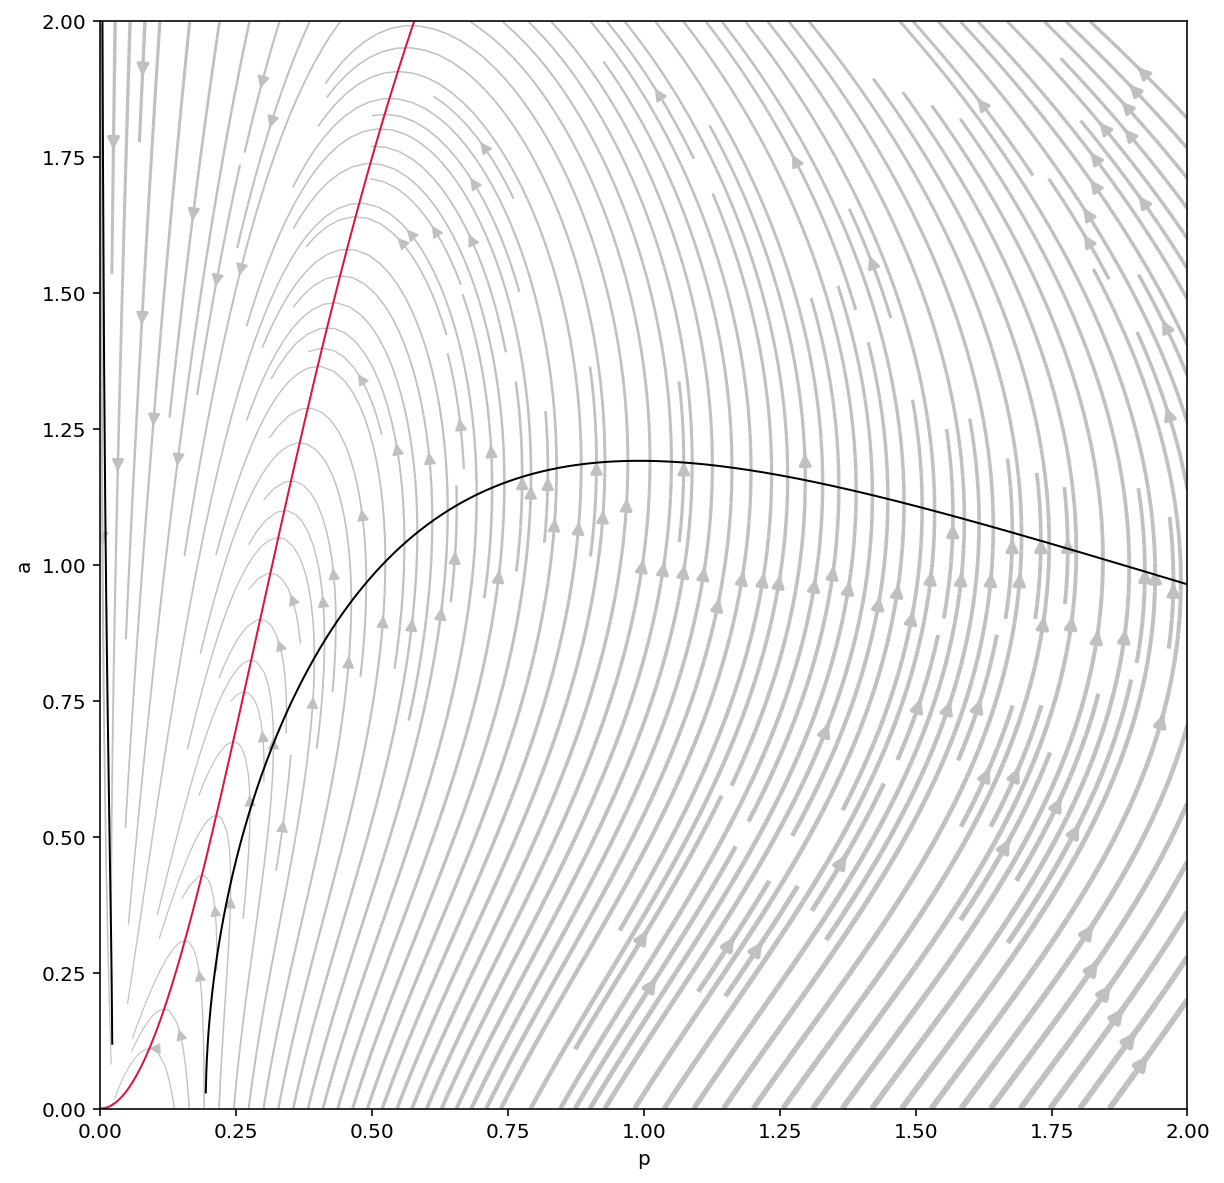

In [84]:
# Set up the figure
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('p')
ax.set_ylabel('a')
ax.set_aspect('equal') #ALPHA 2= 6

# Build the plot
a_range = [0, 2]
b_range = [0, 2]
ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax = vector_field(ax, f, (0,2), (0, 2), args=args)
ax = plot_null_clines_toggle(ax, a_range, b_range, alpha1, alpha2, alpha3, alpha4, gamma)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


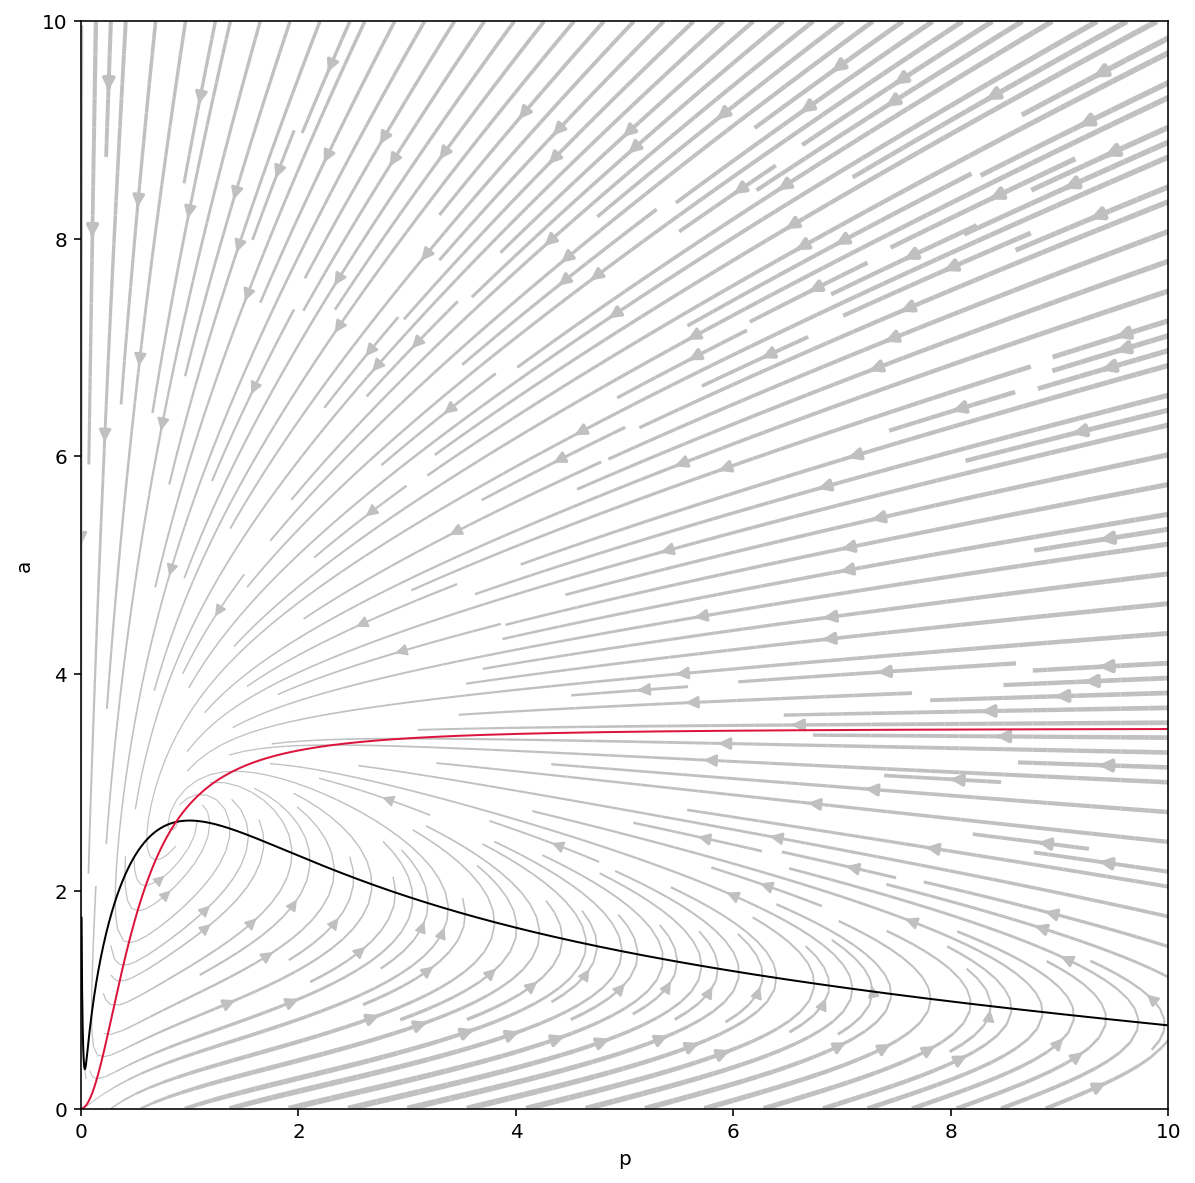

In [92]:
# Set up the figure
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('p')
ax.set_ylabel('a')
ax.set_aspect('equal')

# Build the plot
a_range = [0, 10]
b_range = [0, 10]
ax.set_ylim(0,10)
ax.set_xlim(0,10)
ax = vector_field(ax, f, (0,10), (0, 10), args=args)
ax = plot_null_clines_toggle(ax, a_range, b_range, alpha1, alpha2, alpha3, alpha4, gamma)